In [1]:
import os
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
new_shadow_index_df = pd.read_csv('data/berlin_shadow_box_220323.csv')
old_shadow_index_df = pd.read_csv('data/berlin_shadow_index_filtered_all_trees.csv')
print(new_shadow_index_df.shape)
print(old_shadow_index_df.shape)


(839047, 5)
(801196, 5)


In [50]:
merged_shadow_index_df = new_shadow_index_df
merged_shadow_index_df['o_spring'] = old_shadow_index_df['spring']
merged_shadow_index_df['o_summer'] = old_shadow_index_df['summer']
merged_shadow_index_df['o_autumn'] = old_shadow_index_df['autumn']
merged_shadow_index_df['o_winter'] = old_shadow_index_df['winter']

In [11]:
old_shadow_index_df.head()

,Unnamed: 0,spring,summer,autumn,winter
0,s_wfs_baumbestand.00008100:000bbafb,0.726833,0.550639,0.728217,0.989526
1,s_wfs_baumbestand.00008100:000bbafd,0.685940,0.460291,0.687038,0.937159
2,s_wfs_baumbestand.00008100:000bbafe,0.790626,0.599379,0.792457,1.000000
3,s_wfs_baumbestand.00008100:000bbaff,0.658132,0.505465,0.657389,0.908357
4,s_wfs_baumbestand.00008100:000bbb00,0.710476,0.548261,0.708451,0.960724


In [53]:
melted_new_df = pd.melt(new_shadow_index_df, id_vars=['Unnamed: 0'],var_name='season')
melted_old_df = pd.melt(old_shadow_index_df, id_vars=['Unnamed: 0'],var_name='season')
melted_mergerd_df = pd.melt(merged_shadow_index_df, id_vars=['Unnamed: 0'],var_name='season')

In [13]:
melted_new_df.head()

,Unnamed: 0,season,value
0,00008100:000bbafb,spring,0.60
1,00008100:000bbafd,spring,0.59
2,00008100:000bbafe,spring,0.70
3,00008100:000bbaff,spring,0.45
4,00008100:000bbb00,spring,0.55


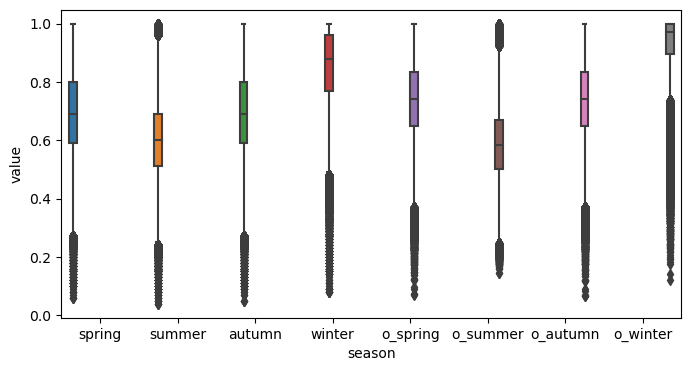

In [66]:
plt.figure(figsize=(8,4))
plot = sns.boxplot(x='season', 
                   y='value', 
                   data=melted_mergerd_df, 
                   hue='season',)
plot.legend_.remove()


<AxesSubplot: ylabel='Density'>

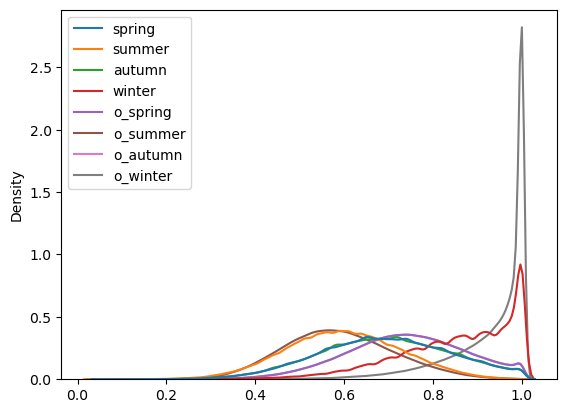

In [62]:
sns.kdeplot(data=merged_shadow_index_df)


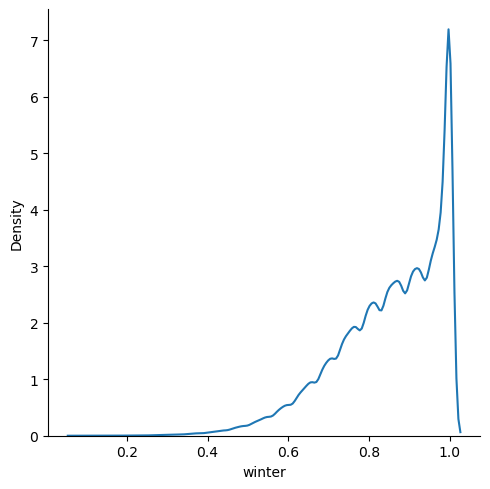

In [46]:
sns.displot(data=new_shadow_index_df, x='winter', kind='kde')

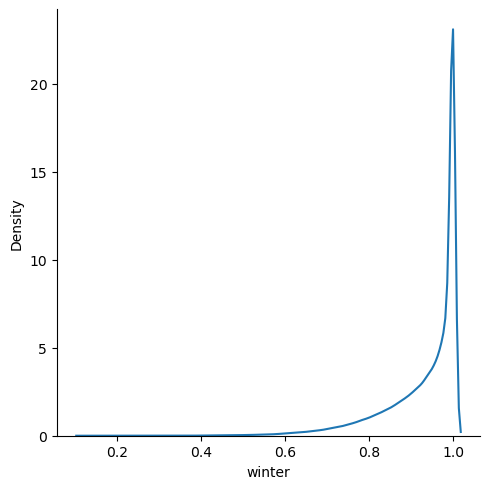

In [47]:
sns.displot(data=old_shadow_index_df, x='winter', kind='kde')

In [40]:
n_spring_min = new_shadow_index_df['spring'].min()
n_summer_min = new_shadow_index_df['summer'].min()
n_autumn_min = new_shadow_index_df['autumn'].min()
n_winter_min = new_shadow_index_df['winter'].min()
n_spring_max = new_shadow_index_df['spring'].max()
n_summer_max = new_shadow_index_df['summer'].max()
n_autumn_max = new_shadow_index_df['autumn'].max()
n_winter_max = new_shadow_index_df['winter'].max()
n_spring_mean = round(new_shadow_index_df['spring'].mean(), 2)
n_summer_mean = round(new_shadow_index_df['summer'].mean(), 2)
n_autumn_mean = round(new_shadow_index_df['autumn'].mean(), 2)
n_winter_mean = round(new_shadow_index_df['winter'].mean(), 2)
n_spring_quantile = round(new_shadow_index_df['spring'].quantile(0.2), 2)
n_summer_quantile = round(new_shadow_index_df['summer'].quantile(0.2), 2)
n_autumn_quantile = round(new_shadow_index_df['autumn'].quantile(0.2), 2)
n_winter_quantile = round(new_shadow_index_df['winter'].quantile(0.2), 2)

o_spring_min = round(old_shadow_index_df['spring'].min(), 2)
o_summer_min = round(old_shadow_index_df['summer'].min(), 2)
o_autumn_min = round(old_shadow_index_df['autumn'].min(), 2)
o_winter_min = round(old_shadow_index_df['winter'].min(), 2)
o_spring_max = old_shadow_index_df['spring'].max()
o_summer_max = old_shadow_index_df['summer'].max()
o_autumn_max = old_shadow_index_df['autumn'].max()
o_winter_max = old_shadow_index_df['winter'].max()
o_spring_mean = round(old_shadow_index_df['spring'].mean(), 2)
o_summer_mean = round(old_shadow_index_df['summer'].mean(), 2)
o_autumn_mean = round(old_shadow_index_df['autumn'].mean(), 2)
o_winter_mean = round(old_shadow_index_df['winter'].mean(), 2)
o_spring_quantile = round(old_shadow_index_df['spring'].quantile(0.2), 2)
o_summer_quantile = round(old_shadow_index_df['summer'].quantile(0.2), 2)
o_autumn_quantile = round(old_shadow_index_df['autumn'].quantile(0.2), 2)
o_winter_quantile = round(old_shadow_index_df['winter'].quantile(0.2), 2)


In [43]:
print("Quantiles 0.2")
print(f'spring: {o_spring_quantile}, {n_spring_quantile}')
print(f'summer: {o_summer_quantile}, {n_summer_quantile}')
print(f'autumn: {o_autumn_quantile}, {n_autumn_quantile}')
print(f'winter: {o_winter_quantile}, {n_winter_quantile}')

Quantiles 0.2
spring: 0.63, 0.56
summer: 0.48, 0.49
autumn: 0.63, 0.56
winter: 0.87, 0.74


In [35]:
print(f'old spring min: {o_spring_min} mean: {o_spring_mean} max: {o_spring_max}')
print(f'new spring min: {n_spring_min} mean: {n_spring_mean} max: {n_spring_max}\n')
print(f'old summer min: {o_summer_min} mean: {o_summer_mean} max: {o_summer_max}')
print(f'new summer min: {n_summer_min} mean: {n_summer_mean} max: {n_summer_max}\n')
print(f'old autumn min: {o_autumn_min} mean: {o_autumn_mean} max: {o_autumn_max}')
print(f'new autumn min: {n_autumn_min} mean: {n_autumn_mean} max: {n_autumn_max}\n')
print(f'old winter min: {o_winter_min} mean: {o_winter_mean} max: {o_winter_max}')
print(f'new winter min: {n_winter_min} mean: {n_winter_mean} max: {n_winter_max}')

old spring min: 0.07 mean: 0.74 max: 1.0
new spring min: 0.06 mean: 0.69 max: 1.0

old summer min: 0.15 mean: 0.59 max: 1.0
new summer min: 0.04 mean: 0.6 max: 1.0

old autumn min: 0.07 mean: 0.74 max: 1.0
new autumn min: 0.05 mean: 0.69 max: 1.0

old winter min: 0.12 mean: 0.93 max: 1.0
new winter min: 0.08 mean: 0.85 max: 1.0


### new shadow index columbiadamm

![Alt text](data/tmp/Old_ColumbiaDamn.png)

### old shadow index Columbiadamm

![Alt text](data/tmp/New_ColumbiaDamn.png)

### new shadow index for Postdamer Platz 

![Alt text](data/tmp/Old_Postdamer.png)

### old shadow index for Postdamer Platz

![Alt text](data/tmp/New_Postdamer.png)